In [1]:
from __future__ import division
import pandas as pd
import numpy as np
from code.survey_processor_full import *
from code.fc_cluster import *


%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.preprocessing import scale
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram



Some urvey questions in this project are similar. In order to see the similarity among these questions, hierarchical cluster heatmap is produced. 

In [2]:
sv = survey('data/survey2/')
sv.num_processor()            # Load processed survey data

In [3]:
df= sv.fin_data

Normalize numerical columns.

In [4]:
df[sv.num_cols] = scale(df[sv.num_cols])

Load small survey data, to get column name list.

In [5]:
small = pd.read_pickle('data/df_id.pkl')

In [6]:
cols = small.columns

In [7]:
cols[:-2]

Index([u'coninc', u'age', u'educom', u'degree', u'sphrs1', u'partyid',
       u'agekdbrn', u'class_', u'dwelling', u'polviews', u'res16', u'incom16',
       u'reliten', u'socbar', u'courts', u'fund', u'finrela', u'natrace',
       u'socfrend', u'divorce', u'fefam', u'natsoc', u'natroad', u'fechld',
       u'helpoth', u'parsol', u'chldidel', u'workhard', u'mawrkgrw',
       u'meovrwrk', u'natspac', u'kidssol', u'mobile16', u'natfare',
       u'marital', u'divlaw', u'affrmact', u'helpnot', u'life', u'spanking'],
      dtype='object')

### extract columns for random forest modeling.

In [8]:
df_s = df[cols[:-2]]

In [9]:
df_s = df_s.astype('float')

### Make a dendrogram

In [31]:
Y = pdist(df_s.T.values,metric='cosine')

In [32]:
sqr = squareform(Y)

In [33]:
tree = linkage(sqr,method = 'complete')

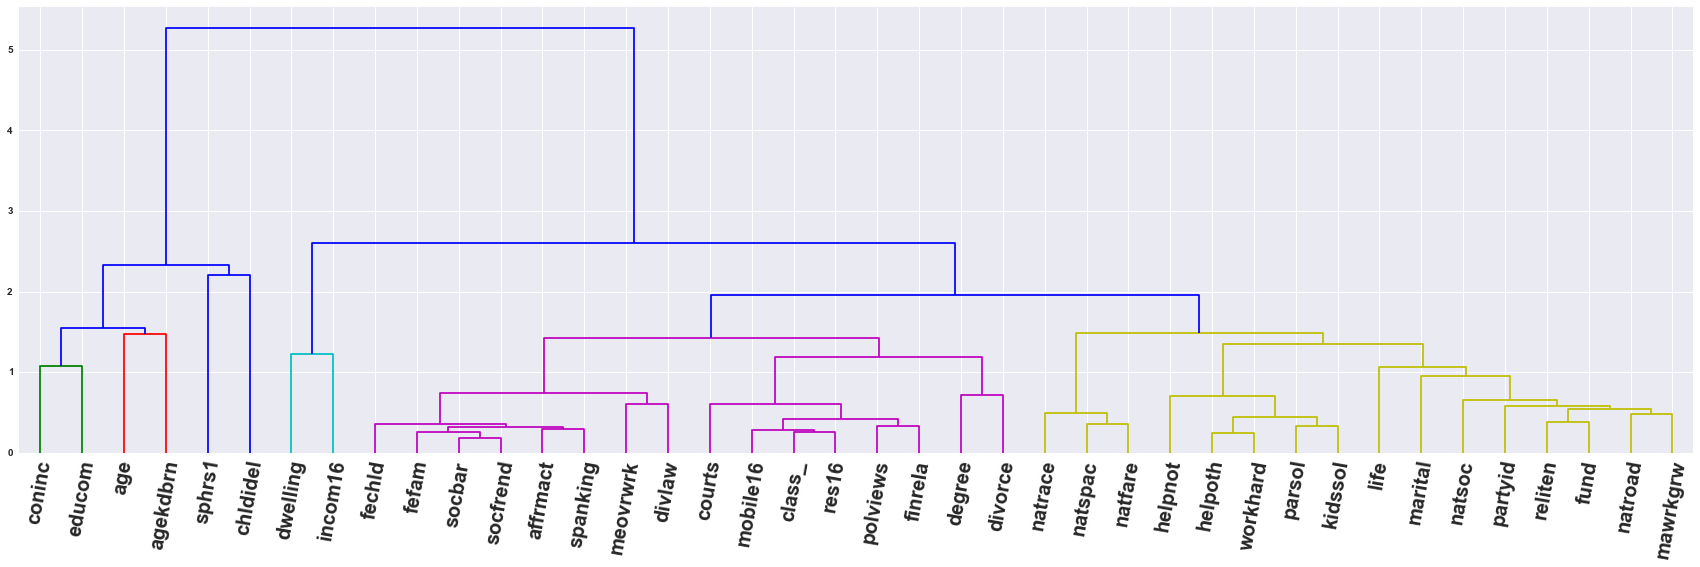

In [34]:
from matplotlib import rc

plt.figure(figsize=(30,8))
rc('font', weight='bold')
ax = dendrogram(tree,labels = np.array(cols[:-2]), leaf_rotation = 80,leaf_font_size=20., color_threshold=1.5)

plt.savefig('imgs/cluster_qs',bbox_inches='tight')

### Write a function to label distances on dendrogram

In [15]:

def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

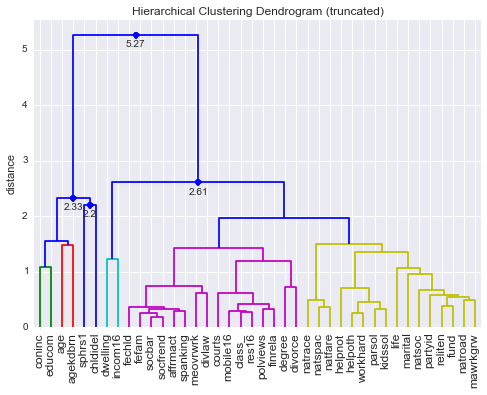

In [16]:
fancy_dendrogram(
    tree,
    truncate_mode='lastp',
    p=67,
    labels = np.array(cols[:-2]),
    leaf_rotation=90.,
    color_threshold=1.5,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=2,  # useful in small plots so annotations don't overlap

)
plt.show()